### Using machine learning to predict whether an internet image is an advertisement or not

#### Index
- Step 1 - creating the dataframe
- Step 2 - Preprocessing
- Step 3 - Exploratory data analysis
- Step 4 - Model building
- Step 5 - Accuracy testing

#### Step 1 - creating the dataframe

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.DOCUMENTATION -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.names -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.7M  100  9.7M    0     0  4463k      0  0:00:02  0:00:02 --:--:-- 4463k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2103  100  2103    0     0   9691      0 --:--:-- --:--:-- --:--:--  9691
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35579  100 35579    0     0   132k      0 --:--:-- --:--:-- --:--:--  132k


We will have a look at the documentation first

In [2]:
!cat *.DOCUMENTATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ad.data',header=None)   
#Reading data into a pandas dataframe
#Header is set to None because the column names are not in the .data file - they are in the .names file.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()
#Having a look at the dataframe

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Now we need to add names to the columns, let us have a look at the names file - ad.names

In [6]:
!cat ad.names

| "w:\c4.5\alladA" names file -- automatically generated!

ad, nonad | classes.

height: continuous.
width: continuous.
aratio: continuous.
local: 0,1.
| 457 features from url terms
url*images+buttons: 0,1.
url*likesbooks.com: 0,1.
url*www.slake.com: 0,1.
url*hydrogeologist: 0,1.
url*oso: 0,1.
url*media: 0,1.
url*peace+images: 0,1.
url*blipverts: 0,1.
url*tkaine+kats: 0,1.
url*labyrinth: 0,1.
url*advertising+blipverts: 0,1.
url*images+oso: 0,1.
url*area51+corridor: 0,1.
url*ran+gifs: 0,1.
url*express-scripts.com: 0,1.
url*off: 0,1.
url*cnet: 0,1.
url*time+1998: 0,1.
url*josefina3: 0,1.
url*truluck.com: 0,1.
url*clawnext+gif: 0,1.
url*autopen.com: 0,1.
url*tvgen.com: 0,1.
url*pixs: 0,1.
url*heartland+5309: 0,1.
url*meadows+9196: 0,1.
url*blue: 0,1.
url*ad+gif: 0,1.
url*area51: 0,1.
url*www.internauts.ca: 0,1.
url*afn.org: 0,1.
url*ran.org: 0,1.
url*shareware.com: 0,1.
url*baons+images: 0,1.
url*area51+labyrinth: 0,1.
url*pics: 0,1.
url*image+navigate: 0,1.
url*pool+images: 0,1.
url*caro

The first 4 columns seems to be height, width, aratio, local respectively. The remaining 1555 columns correspond to each of the url, origurl, ancurl... etc listed in the names file, as well as a final column for class. We will need to read in the column names and assign these column names to our dataframe.

Note here that each url name ends with the string ': 0,1'. We will be using this as the delimiter in the next few lines of code.

In [7]:
f = open('ad.names','r', encoding='ISO-8859-1')  #Encoding set to ISO because the default, utf-8, could not decode the names file

In [8]:
contents = f.read()

In [9]:
contents   #Having a look at the string we read in

'| "w:\\c4.5\\alladA" names file -- automatically generated!\n\nad, nonad | classes.\n\nheight: continuous.\nwidth: continuous.\naratio: continuous.\nlocal: 0,1.\n| 457 features from url terms\nurl*images+buttons: 0,1.\nurl*likesbooks.com: 0,1.\nurl*www.slake.com: 0,1.\nurl*hydrogeologist: 0,1.\nurl*oso: 0,1.\nurl*media: 0,1.\nurl*peace+images: 0,1.\nurl*blipverts: 0,1.\nurl*tkaine+kats: 0,1.\nurl*labyrinth: 0,1.\nurl*advertising+blipverts: 0,1.\nurl*images+oso: 0,1.\nurl*area51+corridor: 0,1.\nurl*ran+gifs: 0,1.\nurl*express-scripts.com: 0,1.\nurl*off: 0,1.\nurl*cnet: 0,1.\nurl*time+1998: 0,1.\nurl*josefina3: 0,1.\nurl*truluck.com: 0,1.\nurl*clawnext+gif: 0,1.\nurl*autopen.com: 0,1.\nurl*tvgen.com: 0,1.\nurl*pixs: 0,1.\nurl*heartland+5309: 0,1.\nurl*meadows+9196: 0,1.\nurl*blue: 0,1.\nurl*ad+gif: 0,1.\nurl*area51: 0,1.\nurl*www.internauts.ca: 0,1.\nurl*afn.org: 0,1.\nurl*ran.org: 0,1.\nurl*shareware.com: 0,1.\nurl*baons+images: 0,1.\nurl*area51+labyrinth: 0,1.\nurl*pics: 0,1.\nurl*ima

In [10]:
contents = contents.split(': 0,1.')   #From observing the ad.names file, each url is delimited by ": 0,1", so we can split on this
contents = contents[2:]   #The first two lines contain data unrelated to the url names, so should be skipped

In [11]:
contents[:10]    #Having a look at the contents

['\nurl*likesbooks.com',
 '\nurl*www.slake.com',
 '\nurl*hydrogeologist',
 '\nurl*oso',
 '\nurl*media',
 '\nurl*peace+images',
 '\nurl*blipverts',
 '\nurl*tkaine+kats',
 '\nurl*labyrinth',
 '\nurl*advertising+blipverts']

In [12]:
contents = [line.replace('\n','') for line in contents]   #Removing the '\n' which is not part of the url name

In [13]:
contents[:10]

['url*likesbooks.com',
 'url*www.slake.com',
 'url*hydrogeologist',
 'url*oso',
 'url*media',
 'url*peace+images',
 'url*blipverts',
 'url*tkaine+kats',
 'url*labyrinth',
 'url*advertising+blipverts']

This is perfect. The first url is likesbooks.com, the second slake.com, and this matches up with what we saw when we ran "!cat ad.names". Time to make column names and assign it to our dataframe!

In [14]:
columns = contents
columns.append('class')    #The last column of our dataframe is the class!
names_of_first_four = ['height','width','ratio','local']    #The first 4 columns of our dataframe are height, width....
columns = names_of_first_four + columns    #Combine into one list
columns    #Have a look at our results

['height',
 'width',
 'ratio',
 'local',
 'url*likesbooks.com',
 'url*www.slake.com',
 'url*hydrogeologist',
 'url*oso',
 'url*media',
 'url*peace+images',
 'url*blipverts',
 'url*tkaine+kats',
 'url*labyrinth',
 'url*advertising+blipverts',
 'url*images+oso',
 'url*area51+corridor',
 'url*ran+gifs',
 'url*express-scripts.com',
 'url*off',
 'url*cnet',
 'url*time+1998',
 'url*josefina3',
 'url*truluck.com',
 'url*clawnext+gif',
 'url*autopen.com',
 'url*tvgen.com',
 'url*pixs',
 'url*heartland+5309',
 'url*meadows+9196',
 'url*blue',
 'url*ad+gif',
 'url*area51',
 'url*www.internauts.ca',
 'url*afn.org',
 'url*ran.org',
 'url*shareware.com',
 'url*baons+images',
 'url*area51+labyrinth',
 'url*pics',
 'url*image+navigate',
 'url*pool+images',
 'url*carousel.org',
 'url*members.accessus.net',
 'url*cmp+flowsoft010',
 'url*smallb+gif',
 'url*www.FlowSoft.com',
 'url*kandinsky',
 'url*csuhayward.edu',
 'url*www.yahoo.co.uk',
 'url*ibitexas.com',
 'url*www.haestad.com',
 'url*antiwar.com',


In [15]:
len(columns)  #If our length = 1559, then everything is perfect

1559

In [16]:
df.columns = columns    #Finally assigning names to our dataframe
df.head()

,height,width,ratio,local,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,...,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,,class
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Everything looks good!

#### Step 2 - Preprocessing

In [17]:
#Finding the number of unique values of each of the first 4 columns
print(len(df['height'].unique()))
print(len(df['width'].unique()))
print(len(df['ratio'].unique()))
print(len(df['local'].unique()))
print(len(df['class'].unique()))

221
278
781
5
2


Things that we should look at
- There are MANY different values for height, width, and ratio. Slight differences in these measurements of sizes are unlikely to be of value. We can thus use binning in these 3 attributes to reduce noise and to smooth out the data.
- There are 5 values for the feature 'local', but it should either take on a 1 or a 0. 
- Class column contains ad or nonad, we should ideally change this to 1 and 0.

In [18]:
df['local'].unique()

array(['1', '0', '?', 1, 0], dtype=object)

In [19]:
df['local'] = df['local'].apply(lambda x: np.nan if x == '?' else x)    #Convert ? to Nan
df['local'] = pd.to_numeric(df['local'])    #Character '0' and '1's are converted to numeric form

In [20]:
df['local'].unique()   #Success

array([ 1.,  0., nan])

Next let us bin the heights, width and ratio
1. Create binning function
2. Bin height
3. Bin width
4. Bin ratio

1. Create binning function

The function below will create 10 bins, evenly spaced between the minimum and the maximum, and will allocate an input value into one of the 10 bins and output the bin. (This is combined with the apply function later on to iterate through each value of a column)

In [21]:
def binning(x, minimum, maximum):
    step = (maximum - minimum)/10
    bins = np.arange(minimum, maximum, step)
    bin_index = int(round(x/step))
    return bins[bin_index - 1]

The function below is used to convert all x values to float, and anything that cannot be converted is replaced with np.nan. This is needed because some of the data is encoded as string values or question marks in string form. 

In [22]:
def purgingstrings(x):
    try:
        float(x)
        return float(x)
    except:
        return np.nan

2. Binning the height

In [23]:
#Note: before binning, we will make a copy of df['height'] so that we can look at the original data
#later in the  data exploration section, BEFORE it has been transformed by binning
min_value = int(min(df['height']))
max_value = int(max(df['height']))
df.height = df['height'].apply(lambda x: purgingstrings(x))   #Passing each value in the height column to the purgingstrings function
height_copy = df['height']
df.height = df['height'].apply(lambda x: binning(x, min_value, max_value) if np.isnan(x) == False else np.nan) #Passing each value in the height column to the binning function

In [24]:
#Checking the unique values in the height column to make sure binnning is successful
df.height.unique()

array([ 64.9,   1. ,   nan, 576.1, 128.8, 384.4, 192.7, 320.5, 256.6,
       448.3])

3. Binning the width

In [25]:
#Note: before binning, we will make a copy of df['width'] so that we can look at the original data
#later in the  data exploration section, BEFORE it has been transformed by binning
min_value = int(min(df['width']))
max_value = int(max(df['width']))
df.width = df['width'].apply(lambda x: purgingstrings(x))
width_copy = df['width']
df.width = df['width'].apply(lambda x: binning(x, min_value, max_value) if np.isnan(x) == False else np.nan)

In [26]:
#Checking the unique values in the width column to make sure binnning is successful
df.width.unique()

array([ 64.9, 384.4, 192.7,   nan,   1. , 512.2, 320.5, 576.1, 128.8,
       256.6, 448.3])

4. Binning the ratio

In [27]:
#Note: before binning, we will make a copy of df['ratio'] so that we can look at the original data
#later in the  data exploration section, BEFORE it has been transformed by binning
df.ratio = df['ratio'].apply(lambda x: purgingstrings(x))
ratio_copy = df['ratio']
min_value = int(min(df['ratio']))
max_value = int(max(df['ratio']))
df.ratio = df['ratio'].apply(lambda x: binning(x, min_value, max_value) if np.isnan(x) == False else np.nan)

In [28]:
#Checking the unique values in the ratio column to make sure binnning is successful
df.ratio.unique()

array([54.,  0., nan, 12.,  6., 24., 30., 18.])

Last step - class is changed from ad/nonad to 1 and 0. 

In [29]:
df['class'] = df['class'].replace({'ad.':1, 'nonad.':0})
df['class'].unique()

array([1, 0])

#### Step 3 - Exploratory data analysis

Creating histogram to look at the distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf7ad57b8>,
      dtype=object)

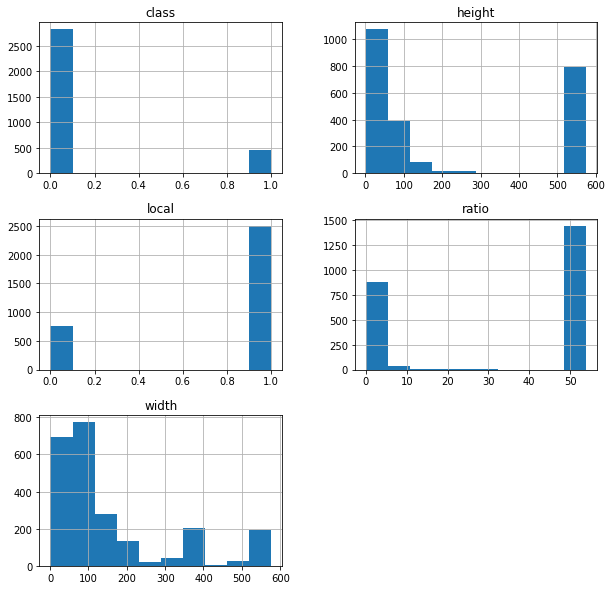

In [30]:
df.loc[:,["class","height","width","ratio","local"]].hist(figsize=(10,10))   #We only want the selected 5 columns because the url columns 
                                                                             #are very sparse and thus their histogram would not be very informative

Key points we should consider from the histograms above are:
- There is a class imbalance, with the majority of the instances being a non-advertisement. We will need to ensure later that our model performs better than a null model which only predicts the dominant class.
- Again, the 'local' feature is imbalanced with majority of instances being '1's. We will need to use this information to impute missing values.

Before doing the pairs plot and the heat map I have recreated a small dataframe of the original data BEFORE binning - so that we can see the relationship of the data BEFORE the binning.

In [31]:
subset = pd.DataFrame({'class':df['class'],"height":height_copy,"width":width_copy,"ratio":ratio_copy, "local":df['local']})


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


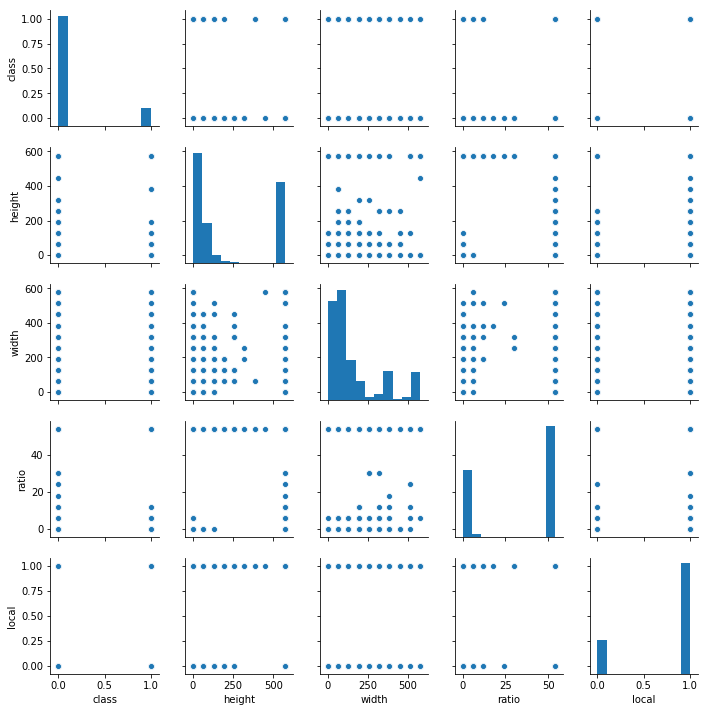

In [32]:
sns.pairplot(subset, height = 2.0)

There is no obvious trend in the first row, which is the one we should focus on as the 'class' is placed on the y axis in that row. There is no noticeable correlation between the features and the class. Maybe a heatmap will provide us with a clearer picture.

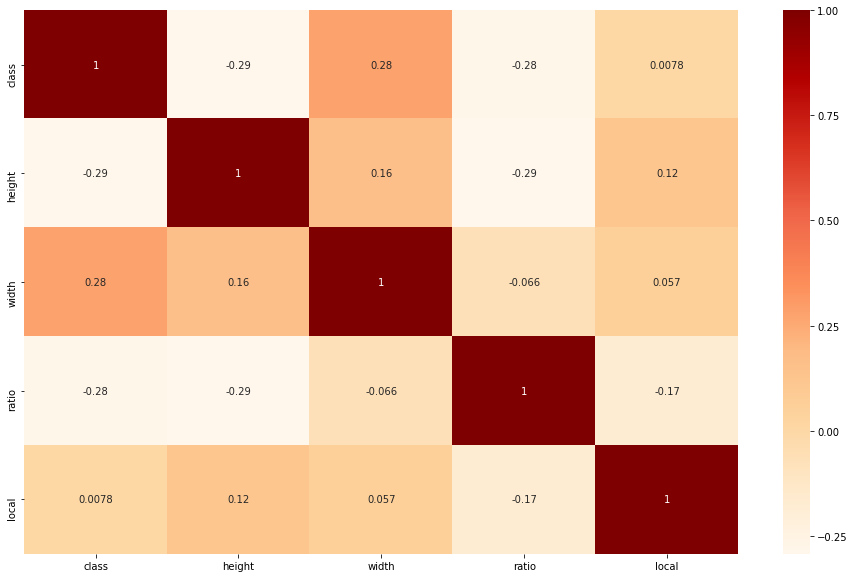

In [33]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

It seems that height, width, and ratio are all correlated with class at quite a similar magnitude, with an absolute value of around 0.3. Local, on the other hand, has very little correlation and we might consider removing this attribute later on.

#### Step 4 -  Model building

I plan to use the decision tree classifier from scikit learn. I will create 3 trees, and then combine the result of the 3 trees using voting. This can be viewed as a "home-made" version of a random forest. Please note here that random forest has its own ways of introducing disagreement amongst its trees such as the use of feature manipulation and has its own ways of obtaining an accuracy score as it uses out of bag accuracies. Therefore my home-made version of the random forest may not be as powerful as the fully implemented version in scikit learn.

At this stage I ran into a minor problem - the decision tree classifier could not handle null values. We have to deal with it now. We will simply impute NA's with the mean, but in the case of 'local', since it can only take on two values, we will impute with the mode. As previously observed in the histograms, the class 'local' is highly imbalanced towards 0 - which is the rationale of using mode over mean for this feature.

In [34]:
df = df.fillna({'local': 0})
height_mean = df['height'].mean()
df = df.fillna({'height': height_mean})
width_mean = df['width'].mean()
df = df.fillna({'width': width_mean})
ratio_mean = df['ratio'].mean()
df = df.fillna({'ratio': ratio_mean})

We will now use train_test_split to split our input dataframe into training and testing sets.

In [35]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop(['class'],axis=1),df['class'],test_size=0.3,random_state=85)

Now we will import the decision tree classifier from scikit learn and create 3 trees. Each one will have a different max_depth paramter and a different random_state. This is to ensure differences amongst each tree which is the basis of random forest.

In [36]:
#Fitting Decision tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree1 = DecisionTreeClassifier(random_state=1, max_depth=3,splitter='random')
decision_tree1 = decision_tree1.fit(train_x, train_y)
first_tree = decision_tree1.predict(test_x)

In [37]:
#Fitting our second tree
decision_tree2 = DecisionTreeClassifier(random_state=2, max_depth=4,splitter='random')
decision_tree2 = decision_tree2.fit(train_x, train_y)
second_tree = decision_tree2.predict(test_x)

In [38]:
#Fitting our third tree
decision_tree3 = DecisionTreeClassifier(random_state=3, max_depth=5,splitter='random')
decision_tree3 = decision_tree3.fit(train_x, train_y)
third_tree = decision_tree3.predict(test_x)

#### Step 5 - Accuracy testing

How do we get the 3 trees to 'vote'? We simply add up the predictions of the 3 trees (note we are doing vector addition here), then divide by 3, then rounding it. If 2 of the trees classify an instance as an advertisement (class label 1) and 1 tree as a non-advertisement (class label 0), the 'class' of the instance will become (1 + 1 + 0)/3 = 0.67, which will be rounded up to 1. On the other hand, if 2 trees classify as non-advertisement and 1 tree as an advertisement, the 'class' will be (0 + 0 + 1)/3 = 0.33 which will be rounded to 0. This is how we get the trees to 'vote'.

In [39]:
predictions = (first_tree + second_tree + third_tree)/3
predictions = predictions.round()

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.9461382113821138

It appears that our 3 tree model has a raw accuracy of 94.6%. 

Previously we have observed class imbalance in the data, with the majority of instances being a non-ad. We want to see how many non-ad instances there are, and to see if our 3 tree model is superior to a null model which only predicts the majority class. 

In [41]:
df['class'].value_counts()

0    2820
1     459
Name: class, dtype: int64

A null model which predicts only the majority class will have an accuracy of 2820/(2820+459) = 0.86 = 86%. Our 3 tree model is much more accurate.

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predictions)

array([[822,   4],
       [ 49, 109]])

Let us interpret the matrix!
- Sensitivity = 822/826 = 0.995
- Specificity(Recall) = 109/157 = 0.694
- Precision = 109/113 = 0.965

Ideally we want every calculated result above to be as high as possible. However, considering that detection of internet advertisement is usually used for the purpose of designing an ad block app, we should prioritize the sensitivity score most! This is because blocking images that are not advertisements (falsely identifying ads) is very detrimental. In this regards, our model performs very well, as our sensitivity score is 0.995. 

Given that there is an advertisement, there is just less than 70% chance (69.4%) of our model picking it up. To improve this we could consider feature selection and maybe the use of other scikit learn algorithms, but this is not covered in my notebook. 